![EUROPE](http://nkpxv44v81c37wr753vdgve1.wpengine.netdna-cdn.com/wp-content/uploads/2015/10/Fotolia_44254321_Subscription_XXL-1000x250.jpg)

<h1 style="color:blue;"> WHERE TO RETIRE AT 50?</h1>

#### EXECUTIVE SUMMARY

Where to Retire by 2050 is a web application that looks at different cities around Europe and ranks the best one to retire in by 2050. It is interactive and displays information about weather, crime, health etc.

The app is built with HTML and python and the data is gathered from the EuroStat website which holds data on all the EU member countries and cities.

___

<h1 style="color:blue;">TABLE OF CONTENTS</h1>

1. [Research](#research)
2. [Data](#data)
3. [Web App](#app)
    1. [User Manual](#user)
    2. [Technical Manual](#technical)
    3. [The Best City?](#best)
    4. [HTML](#html)
4. [Conclusions](#conclusions)
5. [Challenges](#challenge)
6. [Appendix](#appendix)


<h1 style="color:blue;">RESEARCH <a name="research"></a></h1>

This project began with the idea of looking at interesting places to live. The original plan was to use the property website Idealista which has an API.

After requesting and obtaining an API key it turned out that Idealista uses OAuth Authentication which is difficult to work with. Idealista also only lists properties in Spain, Portugal and Italy.

Something with a wider range was needed and EuroStat seemed to be the perfect solution. It has tons of data on all the EU countries and the data is available in many different formats.

Looking through the data and the website an idea was formed. To look at the data around European cities and see which of those would be the best place to retire.

### Documentation
Early on it was realized that somewhere to hold all the documentation and analysis was needed. This came in the form of a Jupyter notebook. A jupyter notebook was the perfect solution for the project as it would hold all the notes, findings and most importantly, code. It looks very much like a lab notebook which suits academia. It could also be shared, edited and added to online easily with Github and NBViewer.

### EuroStat Data
Eurostat hosts it's data in a number of different formats. For this project csv was chosen as it works well with Microsoft Excel with has a nice GUI and can be used to forecast data easily.

### Bokeh
Bokeh is a data visualisation library for python. It is free to use, interactive and works really well with HTML.
___

## Imports/Setup <a name="introduction"></a>

Before building our web app we have to import some python libraries.

**Pandas** to make working with tabular data easier. <br>
**Numpy** for some mathematical calculations. <br>
**Json** for working with the Json data format. <br>
**Requests** for api requests from websites. <br>

In [1]:
import pandas as pd
import numpy as np
import json
import requests
from pandas.io.json import json_normalize

## Data<a name="data"></a>

The first part of getting our web app to function is gathering the data. The web app will work with the .csv format but for the purposes of the project here we will show an API call from the EuroStat website and an import of data.
___

In [2]:
# The eurostat website which holds our city data
url = 'http://ec.europa.eu/eurostat/wdds/rest/data/v2.1/json/en/urb_cpop1?precision=1&indic_ur=DE1001V'

# Requesting the data
data = requests.get(url)

# Parsing the data into json
parsed_data = data.json()

# drilling down to city name level
cities = parsed_data['dimension']
pop = parsed_data['value']
city2 = cities['cities']
city3 = city2['category']
city4 = city3['label']

# printing city names
for k in city4.values():
    parsed_city = k
    print(parsed_city)

Austria
Wien
Graz
Linz
Salzburg
Innsbruck
Klagenfurt
Belgium
Bruxelles / Brussel
Antwerpen
Gent
Charleroi
Liège
Brugge
Namur
Leuven
Mons
Kortrijk
Oostende
Bulgaria
Sofia
Plovdiv
Varna
Burgas
Pleven
Ruse
Vidin
Stara Zagora
Sliven
Dobrich
Shumen
Pernik
Yambol
Haskovo
Pazardzhik
Blagoevgrad
Veliko Tarnovo
Vratsa
Schweiz/Suisse
Zürich
Zürich (greater city)
Genève
Genève (greater city)
Basel
Basel (greater city)
Bern
Bern (greater city)
Lausanne
Lausanne (greater city)
Winterthur
St. Gallen
Luzern
Luzern (greater city)
Lugano
Lugano (greater city)
Biel/Bienne
Cyprus
Lefkosia
Lemesos
Czech Republic
Praha
Brno
Ostrava
Plzen
Ústí nad Labem
Olomouc
Liberec
Ceské Budejovice
Hradec Králové
Pardubice
Zlín
Kladno
Karlovy Vary
Jihlava
Havírov
Most
Karviná
Chomutov-Jirkov
Germany
Berlin
Hamburg
München
Köln
Frankfurt am Main
Essen
Stuttgart
Leipzig
Dresden
Dortmund
Düsseldorf
Bremen
Hannover
Nürnberg
Bochum
Bielefeld
Halle an der Saale
Magdeburg
Wiesbaden
Göttingen
Mülheim a.d.Ruhr
Moers
Darmstadt
Tr

Doncaster
Stockport
Sefton
Sandwell
Sunderland
Bolton
Walsall
Medway
Rotherham
Brighton and Hove
Brighton and Hove
Plymouth
Swansea
Derby
Barnsley
Southampton
Southampton
Oldham
Salford
Tameside
Trafford
Milton Keynes
Rochdale
Solihull
Northampton
North Tyneside
Gateshead
Warrington
Luton
York
Bury
Swindon
Stockton-on-Tees
St. Helens
Basildon
Bournemouth
Bournemouth
Wycombe
Southend-on-Sea
Southend-on-Sea (greater city)
Telford and Wrekin
North East Lincolnshire
Chelmsford
Peterborough
Colchester
South Tyneside
Basingstoke and Deane
Bedford
Dundee City
Falkirk
Reading
Reading (greater city)
Blackpool
Blackpool
Maidstone
Poole
Dacorum
Blackburn with Darwen
Newport
Middlesbrough
Oxford
Torbay
Preston
Preston (greater city)
St Albans
Warwick
Newcastle-under-Lyme
Norwich
Slough
Cheshire West and Chester
Ipswich
Cheltenham
Gloucester
Bracknell Forest
Carlisle
Crawley
Watford
Gosport
Eastleigh
Rushmoor
Rushmoor
Rugby
Corby
Kettering
Inverclyde (Greenock)
Renfrewshire (Paisley)
Derry & Straba

### CSV

As mentioned earlier we will be utitlizing the .csv format for this app. Eurostat has many ready-made data files in this format which are easy to download and work with in Excel.

### Forecasting

Excel also works really well with .csv files and has a very handy forecast function. Here you can see an example of this in action.

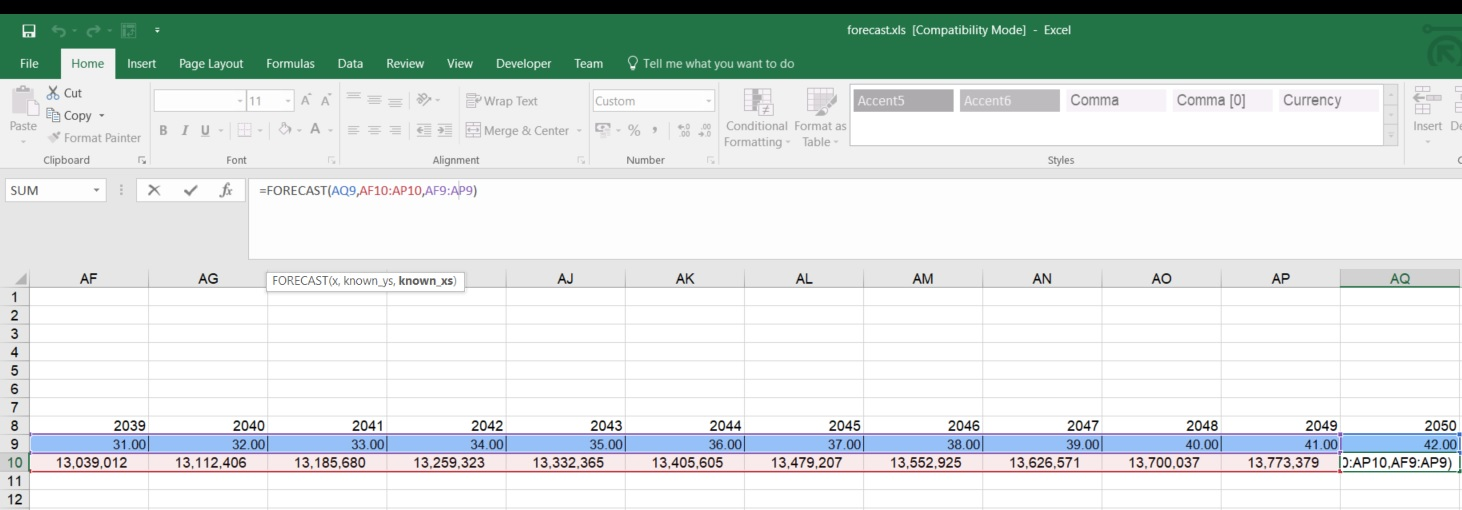

### Reading the data

In [11]:
# Here we are reading the cleaned up csv file.
L_Map = pd.read_csv('retire.csv',sep=',')
L_Map.head()

,Country,City,Location,Avg Rain,Avg Temp,Rain map,Population 2018,pop map 1,Population 2050,pop map 2050,Country Health Care Index
0,Czech Republic,Prague,"(50.07,14.43)",408,9,34,1276221,64,1400381,70,89
1,Denmark,Copenhagen,"(55.67,12.56)",1164,9,97,619039,31,927849,46,92
2,Germany,Berlin,"(52.51,13.40)",562,10,47,3597105,180,4794669,240,92
3,Estonia,Tallinn,"(59.43,24.75)",763,8,64,431050,22,547135,27,86
4,Spain,Barcelona,"(41.38,2.18)",510,16,42,1598921,80,1534227,77,92


<h1 style="color:blue;">WEB APPLICATION<a name="app"></a></h1>

Now that we have our data ready it's time to chart it with bokeh. Before that however we have to make the real world longtitude and latitude coordinates readable.
We can do this by converting them to the mercator web format that Open Street View Map uses.

___

In [12]:
# Maths to convert longtitude and latitude to Mercator for displaying on map
# I found this on a blog post which I have referenced in the appendix below.
import math
from ast import literal_eval
def merc(Coords):
    Coordinates = literal_eval(Coords)
    lat = Coordinates[0]
    lon = Coordinates[1]
    
    r_major = 6378137.000
    x = r_major * math.radians(lon)
    scale = x/lon
    y = 180.0/math.pi * math.log(math.tan(math.pi/4.0 + 
        lat * (math.pi/180.0)/2.0)) * scale
    return (x,y)

In [13]:
# Testing Berlin Coordinates
merc('(52.51,13.40)')

(1491681.1766298658, 6892870.554499138)

In [14]:
# splitting the coordinates into 2 columns for displaying as X and Y on the map.
L_Map['coords_x'] = L_Map['Location'].apply(lambda x: merc(x)[0])
L_Map['coords_y'] = L_Map['Location'].apply(lambda x: merc(x)[1])

In [15]:
# Displaying the newly formatted coordinates in their own columns.
L_Map[['coords_x', 'coords_y','City']].head()

,coords_x,coords_y,City
0,1.606340e+06,6.458407e+06,Prague
1,1.398173e+06,7.493001e+06,Copenhagen
2,1.491681e+06,6.892871e+06,Berlin
3,2.755157e+06,8.273913e+06,Tallinn
4,2.426765e+05,5.068554e+06,Barcelona


### Bokeh

It's now time to import bokeh to visualise our data. As well as the main library there are other sub libraries in bokeh for doing cool things. Each are explained below.

In [16]:
from bokeh.io import output_notebook, show # For outputting to HTML and Jupyter notebook
from bokeh.plotting import figure, output_file # For the plots
from bokeh.layouts import widgetbox # For widgets
from bokeh.models.widgets import Panel, Tabs, Slider # Specific widgets used in the plots
from bokeh.models.glyphs import HBar, VBar # Horizontal and Bar graph plots
from bokeh.tile_providers import CARTODBPOSITRON # Background map from Open Street Map
from bokeh.models import ColumnDataSource, HoverTool, LabelSet, Label #Labels and Column Reader

In [17]:
# Here we are defining the source data for the plots
source = ColumnDataSource(data=dict(
                        x=list(L_Map['coords_x']), # longtitude
                        y=list(L_Map['coords_y']), # latitude
                        size1=list(L_Map['Rain map']), # size of bubbles for rain plot
                        size2=list(L_Map['pop map 1']), # size of bubbles for pop plot
                        size3=list(L_Map['pop map 2050']), #size of bubbles for pop plot 2
                        city=list(L_Map['City']), # City
                        country=list(L_Map['Country']), # Country
                        temp=list(L_Map['Avg Temp']), # Average Temperature
                        pop18=list(L_Map['Population 2018']), # Pop 2018 column
                        pop50=list(L_Map['Population 2050']), # Pop 2050 column
                        health=list(L_Map['Country Health Care Index']), # Health care Index
                        rain=list(L_Map['Avg Rain']))) # Average Rainfall

# Setting up tooltips for Rain Plot
hoverrain = HoverTool(tooltips=[
    ("Average Rain (mm)", "@rain"),
    ("City", "@city"),
    ("Country", "@country"),
    
])

# Setting up tooltips for Temp Plot
hovertemp = HoverTool(tooltips=[
    ("Average Temp °C", "@temp"),
    ("City", "@city"),
    ("Country", "@country"),
    
])

# Setting up tooltips for Health Plot
hoverhealth = HoverTool(tooltips=[
    ("Health Care Index", "@health"),
    ("City", "@city"),
    ("Country", "@country"),
    
])

# Setting up tooltips for Pop Plot
hoverpop18 = HoverTool(tooltips=[
    ("Population 2018", "@pop18"),
    ("City", "@city"),
    ("Country", "@country"),
    
])

# Setting up tooltips for Pop 2050 plot
hoverpop50 = HoverTool(tooltips=[
    ("Population 2050", "@pop50"),
    ("City", "@city"),
    ("Country", "@country"),
    
])


# Rain Plot
p1 = figure(x_axis_type="mercator", 
           y_axis_type="mercator", 
           plot_width = 900, 
           plot_height = 600,
           tools = [hoverrain, 'wheel_zoom','reset','save'])

# Setting the background
p1.add_tile(CARTODBPOSITRON)

p1.circle(x = 'x',y = 'y',
         source = source,
         color = 'blue', 
         alpha = 0.5, 
         size = 'size1')

# Setting up a tab for this plot
tab1 = Panel(child=p1, title="Rain")



#### Temp Plot
cities = list(L_Map['City'])
count = list(L_Map['Avg Temp'])

# Sorting each city to display first depending on size of data
sorted_city = sorted(cities, key=lambda x: count[cities.index(x)])

p2 = figure(x_range=sorted_city,
            plot_width = 900, 
            plot_height = 600, 
            tools=[hovertemp, 'wheel_zoom','reset','save'])

p2.vbar(x="city", 
        top='temp',
        fill_color = 'orange',
        source =source,
        width=0.5)

# Changing axis label orientation
p2.xaxis.major_label_orientation = 1

tab2 = Panel(child=p2, title="Temp")



#### Health Plot

p3 = figure(y_range=sorted_city, 
            plot_width = 900, 
            plot_height = 600, 
            tools=[hoverhealth, 'wheel_zoom','reset','save'])

p3.hbar(y='city', 
        right = 'health',
        color ='green',
        source =source,
        height=0.5)


tab3 = Panel(child=p3, title="Health")

##### Pop Plot
p4 = figure(x_axis_type="mercator", 
           y_axis_type="mercator", 
           plot_width = 900, 
           plot_height = 600,
           tools = [hoverpop18, 'wheel_zoom','reset','save'])

p4.add_tile(CARTODBPOSITRON)

p4.circle(x = 'x',y = 'y',
         source = source,
         color = 'green', 
         alpha = 0.5, 
         size = 'size2')

tab4 = Panel(child=p4, title="Population")

#### Pop  2050
p5 = figure(x_axis_type="mercator", 
           y_axis_type="mercator", 
           plot_width = 900, 
           plot_height = 600,
           tools = [hoverpop50, 'wheel_zoom','reset','save'])

p5.add_tile(CARTODBPOSITRON)

p5.circle(x = 'x',y = 'y',
         source = source,
         color = 'purple', 
         alpha = 0.5, 
         size = 'size3')

# displaying tabs
tab5 = Panel(child=p5, title="Population 2050 - Forecasted")

tabs = Tabs(tabs=[ tab1, tab2, tab3, tab4, tab5])
show(tabs)

# output to jupyter notebook

output_notebook()

Loading BokehJS ...

<h1 style="color:blue;">USER MANUAL/VISUAL WALKTHROUGH <a name="user"></a></h1>

### Tabs
You can switch between plots by clicking on different tabs at the top of the web app.

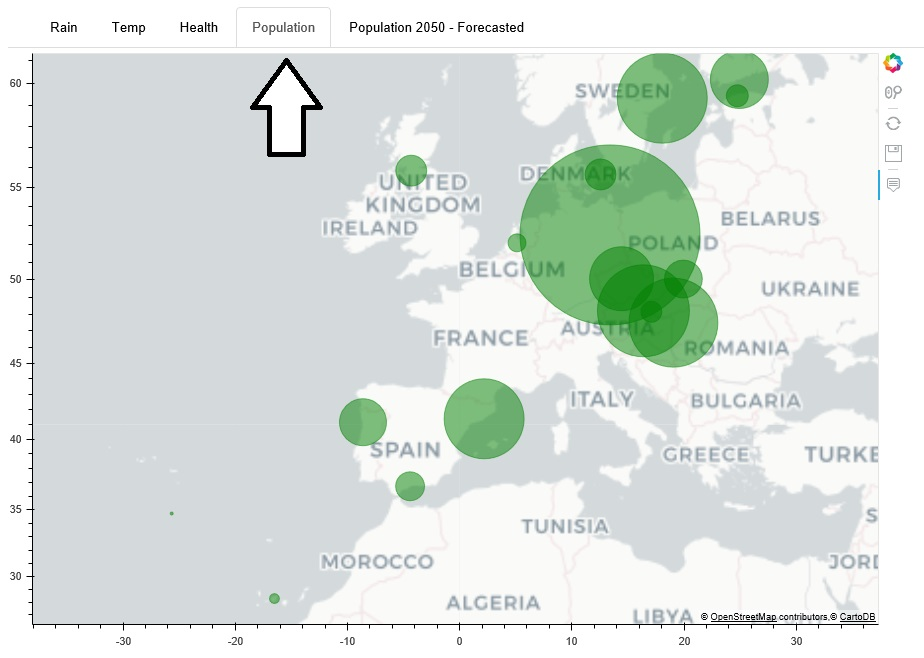

### Tool Tips

To see more details about the data you can scroll over each point with your mouse.
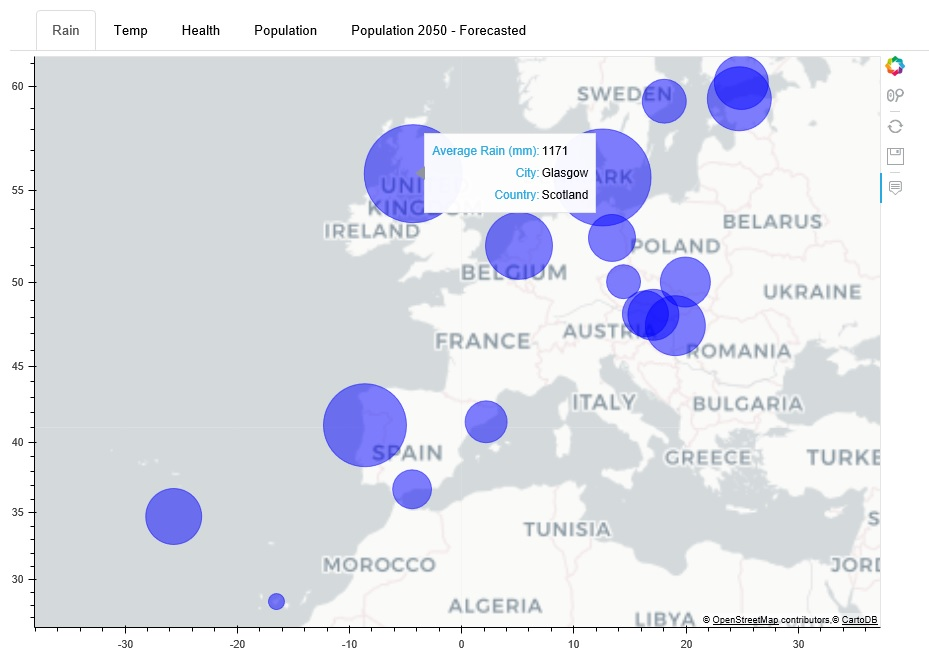

You can also turn this option off at the side of the plot.
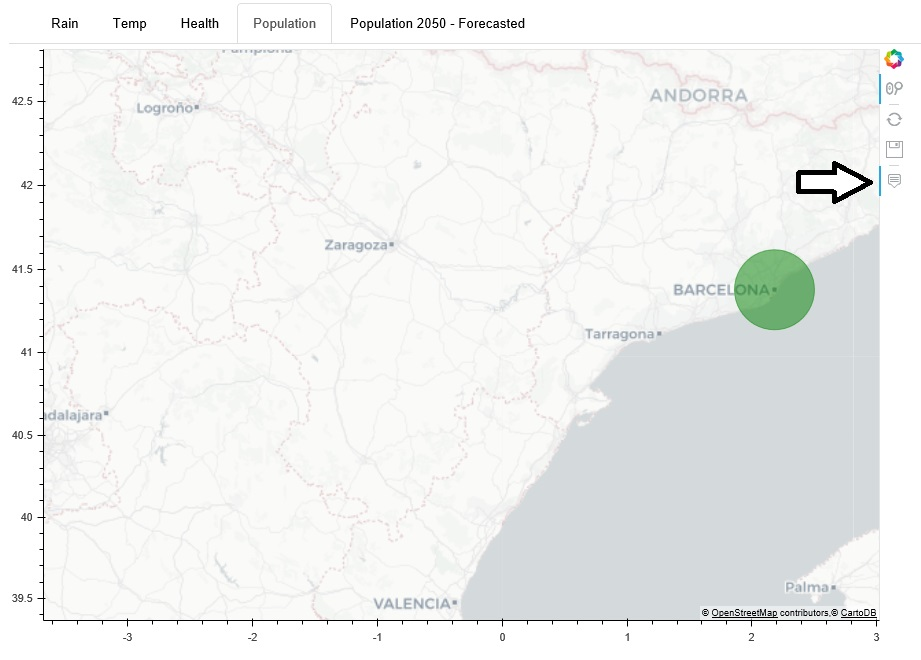

### Controls

#### Scroll Wheel
If you'd like to zoom in you can turn on the scroll wheel option and scroll with your mouse wheel.
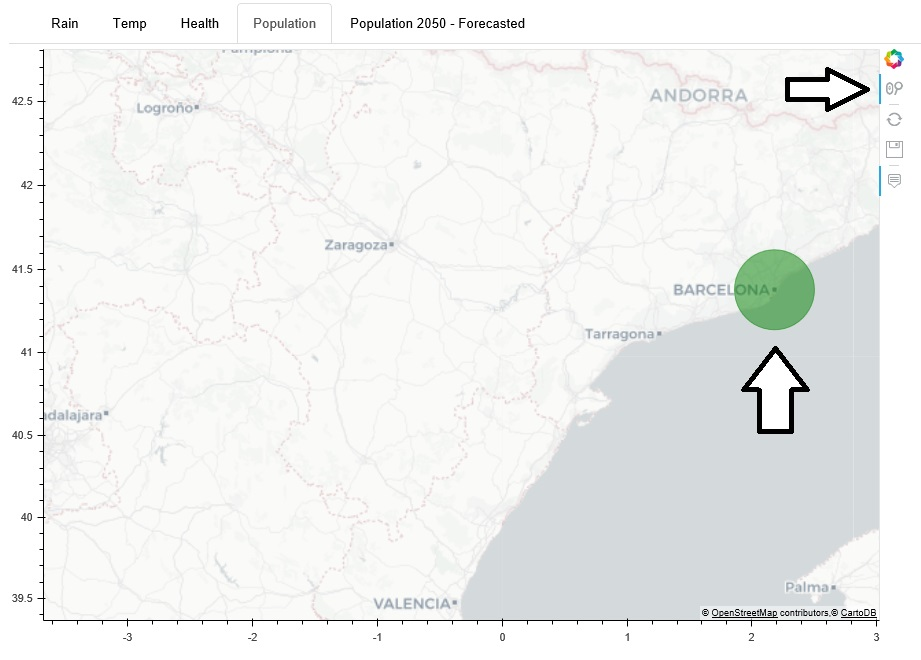

#### Save
You can also save the plot by clicking here.
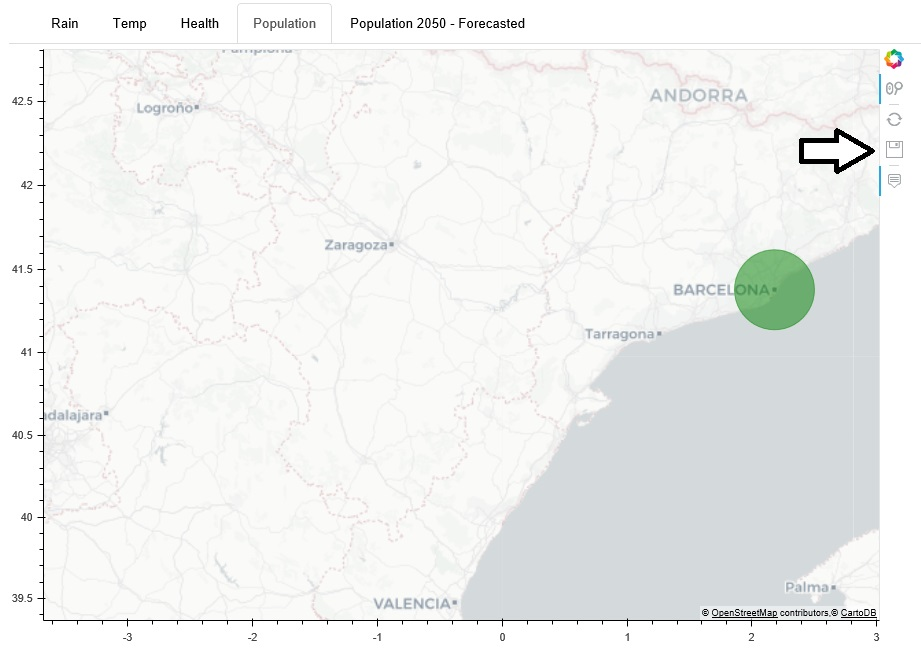

#### Reset
Finally you can click here to reset everything.
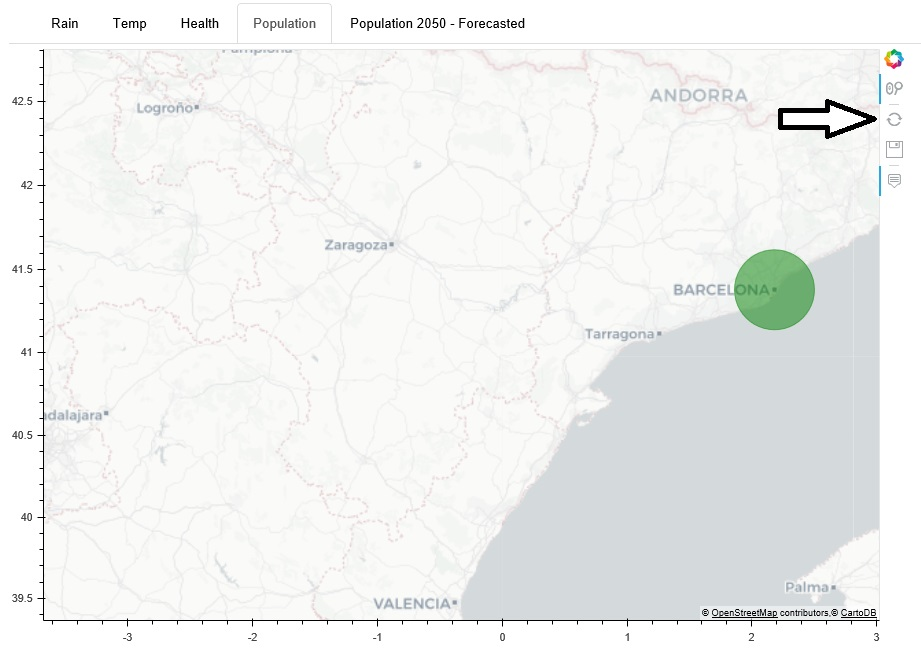
___

<h1 style="color:blue;">THE BEST CITY? <a name="best"></a></h1>

In Excel I gave each city a rank based on weightings. The most important factors for me in this order.
* Average Temperature
* Average Rainfall
* Population
* Health Index

I saved this as a new csv which you can see below. Tenerife came out on top.

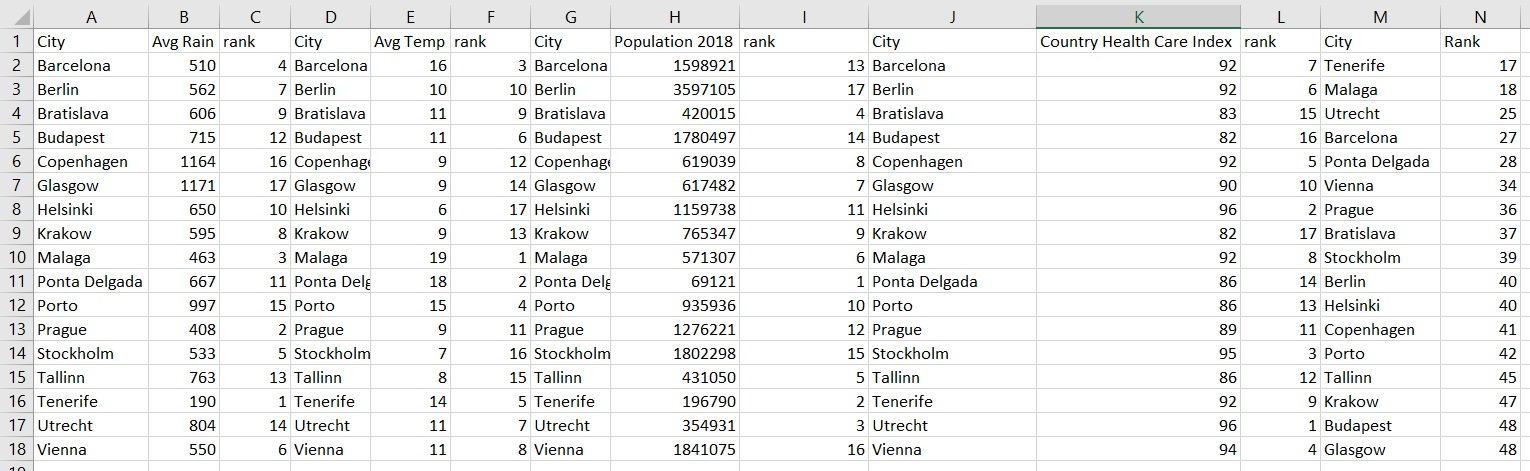
___

In [10]:
Best = pd.read_csv('rank.csv',sep=',')

# Styling the top result green
Best.head(10).style.highlight_min(axis=0, color='lightgreen')

,City,Rank
0,Tenerife,1
1,Malaga,2
2,Utrecht,3
3,Barcelona,4
4,Ponta Delgada,5
5,Vienna,6
6,Prague,7
7,Bratislava,8
8,Stockholm,9
9,Berlin,10


<h1 style="color:blue;">HTML/WEB PAGE<a name="html"></a></h1>

For the web page I utilised Github's Gitpages tool. It turns your readme file on github into a HTML web page.

It was very easy to setup. I used the built in theme provided and through my bokeh plot into an iframe.

___

<h1 style="color:blue;">CONCLUSIONS<a name="conlusions"></a></h1>

Going into this project I had some conceptions about cities I'd like to live in. I thought Berlin would be much higher in the ranking for instance. 

___

<h1 style="color:blue;">CHALLENGES<a name="challenge"></a></h1>

The hardest part of the project was working with bokeh.

___

<h1 style="color:blue;">APPENDIX <a name="appendix"></a></h1>

Working with Bokeh <br>
https://towardsdatascience.com/exploring-and-visualizing-chicago-transit-data-using-pandas-and-bokeh-part-i-intro-to-pandas-5d6caa8813ef <br>
https://towardsdatascience.com/exploring-and-visualizing-chicago-transit-data-using-pandas-and-bokeh-part-ii-intro-to-bokeh-5dca6c5ced10 <br>

___